In [ ]:
# CIFAR-10 CNN training notebook
# Trains a model and saves cifar10model.h5 for Streamlit app

2.19.0


In [ ]:
import tensorflow as tf
print (tf.__version__)

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
print('Training Images:', X_train.shape)
print('Test Images:', X_test.shape)

Training Images: (50000, 32, 32, 3)
Test Images: (10000, 32, 32, 3)


In [4]:
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip = True
)

datagen.fit(X_train)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(X_test, y_test)
)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 106s 133ms/step - accuracy: 0.2577 - loss: 1.9754 - val_accuracy: 0.4698 - val_loss: 1.4546
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 130ms/step - accuracy: 0.4450 - loss: 1.5223 - val_accuracy: 0.5342 - val_loss: 1.3080
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 106s 136ms/step - accuracy: 0.5104 - loss: 1.3707 - val_accuracy: 0.5931 - val_loss: 1.1521
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - accuracy: 0.5487 - loss: 1.2722 - val_accuracy: 0.5963 - val_loss: 1.1531
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 129ms/step - accuracy: 0.5751 - loss: 1.2071 - val_accuracy: 0.6252 - val_loss: 1.0625
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - accuracy: 0.6006 - loss: 1.1447 - val_accuracy: 0.6413 - val_loss: 1.0289
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 127ms/step - accuracy: 0.6205 - loss: 1.0898 - val_accuracy: 0.6665 - val_loss: 0.9382
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - accuracy: 0.6311 - loss: 1.05

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7337 - loss: 0.7808
Test accuracy: 0.7325999736785889


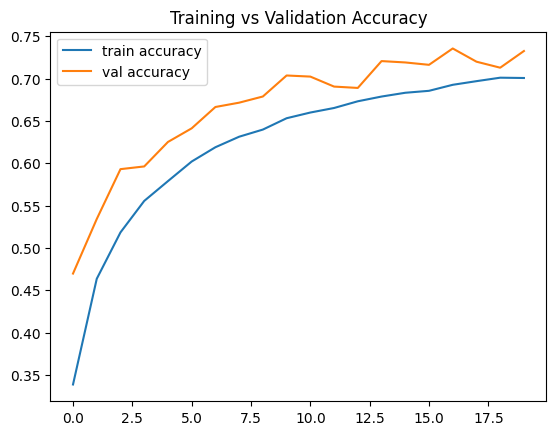

In [ ]:
def plot_training_history(history):
    import matplotlib.pyplot as plt
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.legend()
    plt.title('Training vs Validation Accuracy')
    plt.show()

plot_training_history(history)

In [ ]:
import numpy as np

index = 10
image = X_test[index]

prediction = model.predict(np.expand_dims(image, axis=0), verbose=0)
predicted_class = np.argmax(prediction)

print('Predicted class: ', predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Predicted class:  4


In [ ]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

print('Prediction:', class_names[predicted_class])

Prediction: deer


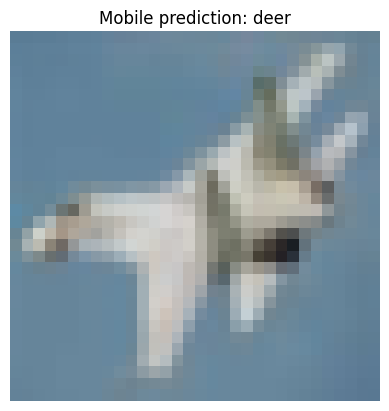

In [13]:
plt.imshow(image)
plt.title('Mobile prediction: '+ class_names[predicted_class])
plt.axis('off')
plt.show()

In [ ]:
import os
os.makedirs('model', exist_ok=True)
model.save('model/cifar10model.h5')